In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

|  属性  |                  描述                  |
|:------:|:--------------------------------------:|
| `images` | 8x8 矩阵，记录每张手写字符图像对应的像素灰度值 |
|  `data`  | 将 images 对应的 8x8 矩阵转换为行向量 |
| `target` |     记录 1797 张影像各自代表的数字     |



In [3]:
digits.target[0]

0

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
# 将矩阵扁平化为行向量：
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

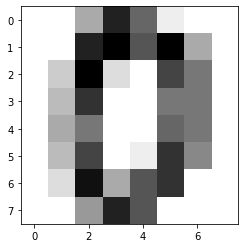

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

image1 = digits.images[0]
plt.imshow(image1, cmap=plt.cm.gray_r)

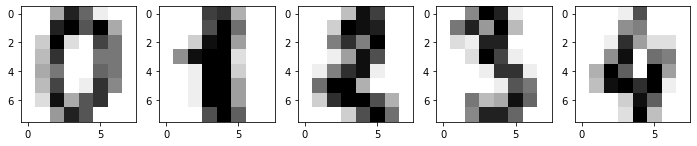

In [10]:
fig, axes = plt.subplots(1,5, figsize=(12,4))

for i, image in enumerate(digits.images[0:5]):
    axes[i].imshow(image,cmap=plt.cm.gray_r)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state=30)

len(X_train), len(y_train), len(X_test), len(y_test), np.mean(y_test[5:13])

(1437, 1437, 360, 360, 3.75)

### 使用 scikit-learn 搭建人工神经网络

scikit-learn 中的 `MLPClassifier()` 类实现了具有反向传播算法的多层神经网络结构。

<pre style="font-size:14px; line-height:17px;" class="hljs">
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
</pre>

<pre style="font-size:14px; line-height:17px;" class="hljs">
- hidden_layer_sizes: 定义隐含层及包含的神经元数量，(20, 20) 代表 2 个隐含层各有 20 个神经元。
- activation: 激活函数，有 identity（线性）, logistic, tanh, relu 可选。
- solver: 求解方法，有 lbfgs（拟牛顿法），sgd（随机梯度下降），adam（改进型 sgd） 可选。adam 在相对较大的数据集上效果比较好（上千个样本），对小数据集而言，lbfgs 收敛更快效果也很好。 
- alpha: 正则化项参数。
- learning_rate: 学习率调整策略，constant（不变），invscaling（逐步减小），adaptive（自适应） 可选。
- learning_rate_init: 初始学习率，用于随机梯度下降时更新权重。
- max_iter: 最大迭代次数。
- shuffle: 决定每次迭代是否重新打乱样本。
- random_state: 随机数种子。
- tol: 优化求解的容忍度，当两次迭代损失差值小于该容忍度时，模型认为达到收敛并且训练停止。
</pre>



In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def mpl():
    """
    参数:无

    返回:
    model -- 人工神经网络模型
    score -- 测试集上的预测准确率
    """
    ### 代码开始 ### (≈ 2 行代码)
    model = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu',solver='sgd',learning_rate_init=0.02,learning_rate='constant', max_iter=100,random_state=1)
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test) )
    ### 代码结束 ###
    return model, score

In [15]:
mpl()[1]

0.9777777777777777

按照上面参数训练出来的神经网络一般准确率可以达到 $98\%$ 左右。我们可以输出 `model` 的一些属性，例如迭代的次数以及绘制迭代损失变化曲线。

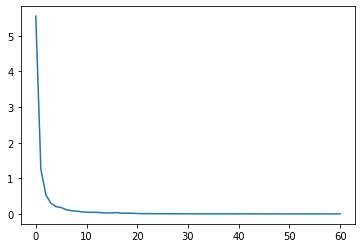

In [17]:
model = mpl()[0]

plt.plot(model.loss_curve_)

In [18]:
# 查看模型收敛时候的迭代次数

model.n_iter_

61